Aayusha Lamichhane

 - Collaborator - Megha Shakya

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [121]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [123]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [124]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

# Creating a linear regression model
model_LR = sk.linear_model.LinearRegression()
model_LR.fit(X_train, y_train)

# Makeing predictions using the model
y_pred_train = model_LR.predict(X_train)
y_pred_test = model_LR.predict(X_test)
y_pred = model_LR.predict(X)

# To assess the model using MSE and R^2
MSE_train = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train = model_LR.score(X_train, y_train)
 
# MSE: Lower is better.
# R^2: (closer to 1 means a better fit).

MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test = model_LR.score(X_test, y_test)


print(f'model coefficients: {model_LR.coef_}, {model_LR.intercept_}') 
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')


print_model(model_LR.intercept_, model_LR.coef_, column_names, model_name = 'Best Fit Linear Regression Model')

model coefficients: [21.92089219 21.31423311 95.69443549  7.10226919 48.99160003], -6.814507269726663
MSE_test = 115.58, MSE_train = 90.99
R2_test = 0.99, R2_train = 0.99
Best Fit Linear Regression Model:
 y = -6.81 + 21.92*x1 + 21.31*x2 + 95.69*x3 + 7.10*x4 + 48.99*x5


#### Your written answers here

What are your model parameters?
 - Intercept: -6.81
- Coefficients:
    - x₁: 21.92
    - x₂: 21.31
    - x₃: 95.69
    - x₄: 7.10
    - x₅: 48.99

What were your MSE and R^2?
- MSE:
    - Training MSE = 90.99
    - Testing MSE = 115.58
- R²:
    - Training R² = 0.99
    - Testing R² = 0.99

## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [125]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


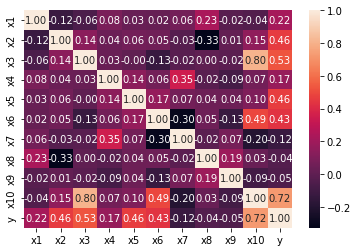

In [126]:
corr = reg2_df.corr() # corr function to compute the correlation matrix

sns.heatmap(corr, annot=True, fmt=".2f")  #seaborn heatmat function to plot the correlation matrix
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

candidate_idx = [0, 1, 2, 3, 4, 5]

# candidate_idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # use this after running the next code block

Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_names

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=1)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)  
R2_test = model_LR.score(Z_test, y_test)  

# For MSE

y_pred_train = model_LR.predict(Z_train)
y_pred_test = model_LR.predict(Z_test)


print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')
print(f'MSE_train: {sk.metrics.mean_squared_error(y_train, y_pred_train):.2f}')
print(f'MSE_test: {sk.metrics.mean_squared_error(y_test, y_pred_test):.2f}')



R2_train: 0.86
R2_test: 0.90
MSE_train: 9.76
MSE_test: 8.77


In [129]:
model_LR.__dict__  # shows all the things there

print_model(bias, coef, column_names, model_name='True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name='Fit Model')

# now we can compare how it did

# x10 redundant with x3 and x6
# x4 off


True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.11 + 61.14*x1 + 73.53*x2 + 104.77*x3 + 12.73*x4 + 54.77*x5 + 71.59*x6


#### Your written answers here

What are your model parameters?
- Intercept: -15.11  
- Coefficients:  
  - x1: 61.14  
  - x2: 73.53  
  - x3: 104.77  
  - x4: 12.73  
  - x5: 54.77  
  - x6: 71.59 

Which features (x1, x2...) were significant? Which were co-linear?
 -  Significant Features:  
  - x1, x2, x3, x4, x5, x6 had relatively large coefficients, meaning they contributed significantly to the model.  
- Co-linear Features:  
  - x10 was strongly correlated with x3 (0.80) and x6 (0.49), meaning it was redundant. 
 
What were your MSE and R^2?
- $R^2$ for Training Set: 0.86  
- $R^2$ for Test Set: 0.90  
- $MSE$ for Training Set: 9.76  
- $MSE$ for Test Set: 8.77  



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [130]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


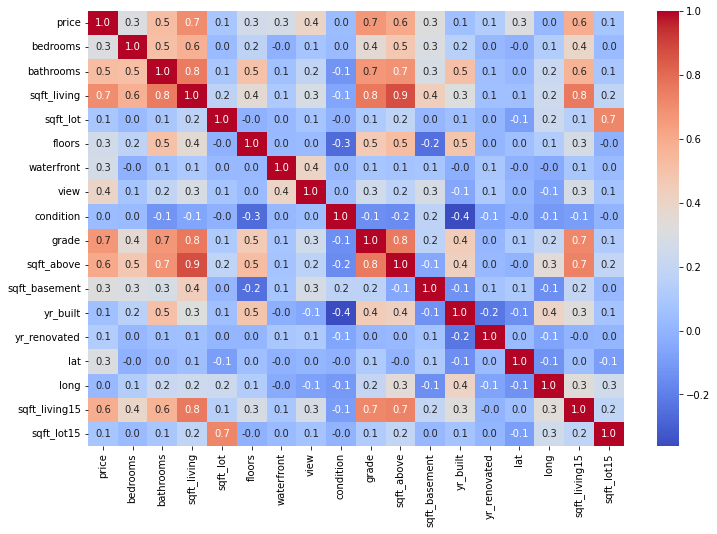

In [131]:
# Your code here. Add cells as needed.

# Drop non-numeric columns
housing_df_numeric = housing_df.drop(columns=['id', 'date', 'zipcode'])

# Compute correlation
corr = housing_df_numeric.corr()

# Plot heatmap

plt.figure(figsize=(12, 8))  # Adjust width and height
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()


In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ss = StandardScaler()
 
X = housing_df[['bathrooms', 'sqft_living', 'grade']]
y = housing_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling the data
ss.fit(X_train)  # fit the scaler to the training data

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

# Creating and training the model
model = LinearRegression()
model.fit(X_scaled_train, y_train)

# Evaluating the model
R2_train = model.score(X_scaled_train, y_train)  
R2_test = model.score(X_scaled_test, y_test)  

# For MSE
y_pred_train = model.predict(X_scaled_train)
y_pred_test = model.predict(X_scaled_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')


R2_train: 0.54
R2_test: 0.54
MSE_test = 79894226121.79, MSE_train = 58075151476.51


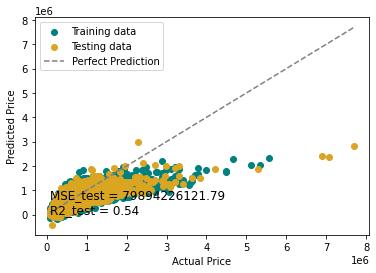

In [136]:
plt.scatter(y_train, y_pred_train, color='teal', label='Training data')
plt.scatter(y_test, y_pred_test, color='goldenrod', label='Testing data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='gray', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.text(y.min(), y.min(), f'MSE_test = {MSE_test:.2f}\nR2_test = {R2_test:.2f}', fontsize=12)

plt.legend()
plt.show()

#### Your written answers here
Which features are you using and why?
 
 I picked these three features—bathrooms, sqft_living, and grade—because each one shows a relatively high individual correlation with price in the heatmap:

 - Bathrooms: It has a strong positive correlation (around 0.5) with price. More bathrooms generally indicate a larger, more expensive home.
 - sqft_living: This feature has one of the highest correlations (around 0.8) with price. Meaning, bigger living spaces tend to cost more.
 - Grade: With a correlation around 0.7, grade measures overall construction and design quality; higher-grade homes command higher prices.

I also checked that these features aren’t excessively correlated with each other to avoid collinearity issues.

#### $R^2$
 - My $R^2$ is 0.54.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [141]:
# Your code here. Add cells as needed.

from sklearn.linear_model import Lasso

housing_df2 = housing_df.drop(columns=['price', 'date', 'zipcode'])  # Drop target & irrelevant columns
y = housing_df['price']  # Target variable
X = housing_df2  # Features

feature_names = X.columns  # Ensure all features are saved

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit & transform training data
X_test = scaler.transform(X_test)  # Transform test data

# Using Lasso 
alpha_value = 1000
model_lasso = Lasso(alpha=alpha_value)  
model_lasso.fit(X_train, y_train)

# Predictions
y_pred_train = model_lasso.predict(X_train) 
y_pred_test = model_lasso.predict(X_test)

# MSE & R²
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

R2_train = model_lasso.score(X_train, y_train)
R2_test = model_lasso.score(X_test, y_test)

print(f'Alpha: {alpha_value}')
print(f'R2_train: {R2_train:.2f}, R2_test: {R2_test:.2f}')
print(f'MSE_train: {MSE_train:.2f}, MSE_test: {MSE_test:.2f}')


# For model coefficients
coeff = model_lasso.coef_

top_features_idx = np.argsort(np.abs(coeff))[-3:]  # Get indices of top 3 features
top_features = feature_names[top_features_idx]
top_coeff_values = coeff[top_features_idx]

print("\nTop 3 most important features based on absolute coefficients:")
for feat, coef in zip(top_features, top_coeff_values):
    print(f"{feat}: {coef:.2f}")

Alpha: 1000
R2_train: 0.70, R2_test: 0.68
MSE_train: 37633917095.46, MSE_test: 55292627304.93

Top 3 most important features based on absolute coefficients:
lat: 78615.44
grade: 113900.80
sqft_living: 127389.99


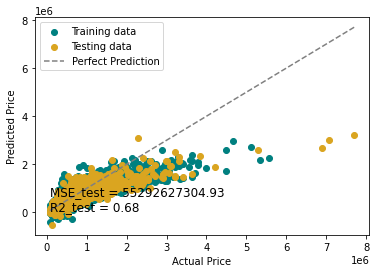

In [142]:
# Plot predicted vs actual home prices
plt.scatter(y_train, y_pred_train, color='teal', label='Training data')
plt.scatter(y_test, y_pred_test, color='goldenrod', label='Testing data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='gray', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.text(y.min(), y.min(), f'MSE_test = {MSE_test:.2f}\nR2_test = {R2_test:.2f}', fontsize=12)

plt.legend()
plt.show()

### Your written answers here
Which regression did you use?
 - Lasso Regression

 - The feature with 3 biggest (absolute value) coefficients are:
 1. lat: 79089.62
 2. grade: 113540.933
 3. sqft_living: 127311.41

Does your regularized model look better than your MLR? How so?
 - Yes, the Lasso model looks better than Multiple Linear Regression (MLR). It's because of the following reasons:
  1. The Lasso model has \( $R^2 = 0.68 $\) compared to \( $R^2 = 0.54 $\) in the first plot. This means the Lasso model explains more variance in the house prices.  
  2. The Lasso model has \( MSE = 55.13B \), which is significantly lower than \( MSE = 79.89B \) in the first model. This indicates less error in price predictions.  
  3. Lasso eliminates less important features by shrinking their coefficients to zero. This prevents overfitting and improves generalization.  

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

In [143]:
# Your code here. Add cells as needed.

housing_df2 = housing_df.drop(columns=['price', 'date', 'zipcode'])  
y = housing_df['price']
X = housing_df2  

# Split data into below and above $1M
below_1M_mask = y < 1_000_000
above_1M_mask = y >= 1_000_000

X_below, y_below = X[below_1M_mask], y[below_1M_mask]
X_above, y_above = X[above_1M_mask], y[above_1M_mask]

# Decided to create a function to train and plot Lasso regression - prevents duplication of code for the same thing

def train_and_plot(X, y, title, alpha_value=1000):
    # Spliting into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Scale the features
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_test = scaler.transform(X_test)

    # Lasso Regression
    model = Lasso(alpha=alpha_value)
    
    # Training the  model
    model.fit(X_scaled_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_scaled_train)
    y_pred_test = model.predict(X_scaled_test)

    #  MSE & R^2
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    R2_train = model.score(X_scaled_train, y_train)
    R2_test = model.score(X_scaled_test, y_test)

    print(f'{title}')
    print(f'Alpha: {alpha_value}')
    print(f'R2_train: {R2_train:.2f}, R2_test: {R2_test:.2f}')
    print(f'MSE_train: {MSE_train:.2f}, MSE_test: {MSE_test:.2f}\n')
    
    # For the figures
    
    plt.figure(figsize=(6,6))
    plt.scatter(y_train, y_pred_train, color='teal', label='Training data')
    plt.scatter(y_test, y_pred_test, color='goldenrod', label='Testing data')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='gray', linestyle='--', label='Perfect Prediction')

    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.text(y.min(), y.min(), f'MSE_test = {MSE_test:.2f}\nR2_test = {R2_test:.2f}', fontsize=12)

    plt.legend()
    plt.title(title)
    plt.show()

Lasso Regression for Houses Below $1M
Alpha: 1000
R2_train: 0.69, R2_test: 0.69
MSE_train: 12017403217.36, MSE_test: 11794866644.41



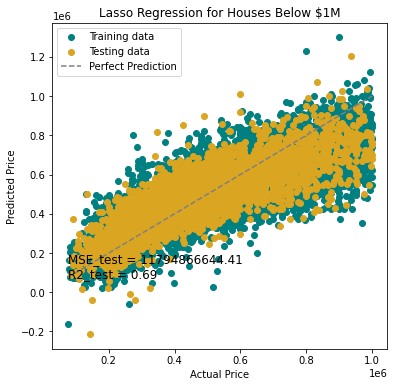

Lasso Regression for Houses Above $1M
Alpha: 1000
R2_train: 0.51, R2_test: 0.56
MSE_train: 181473960905.69, MSE_test: 214099143438.40



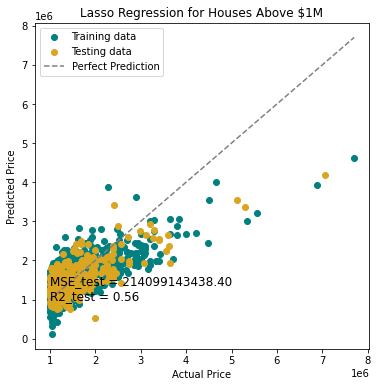

In [145]:
train_and_plot(X_below, y_below, "Lasso Regression for Houses Below $1M", alpha_value=1000)
train_and_plot(X_above, y_above, "Lasso Regression for Houses Above $1M", alpha_value=1000)

 ### Your written answers here

 What are the $R^2$ for the two models?

- Lasso Regression for Houses Below $1M
  - $R^2$ train = 0.69
  - $R^2$ test= 0.69  

- Lasso Regression for Houses Above $1M 
  - $R^2$ train = 0.51  
  - $R^2$ test = 0.56  